<a href="https://colab.research.google.com/github/Eylz-Liu/Mod-le-vol-locale/blob/main/Etude_GSE_Output_v1911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 - Importation de tirage


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

1.1 Extraction de GSE Taux *court* Yearly


In [2]:
# Étape 1 : Uploader le fichier Excel depuis ton ordinateur
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_TXCOURT_Y.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name=0, header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities):", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
TL_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
#print("scenario:", scenario)
print("Maturities (years):", maturities)
print("TL Matrix shape:", TL_matrix.shape)
print("TL Matrix (extrait):\n", TL_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_TXCOURT_Y.xlsx to TIRAGES_TXCOURT_Y.xlsx
T_array (maturities): (42,)
Maturities (years): [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TL Matrix shape: (1000, 42)
TL Matrix (extrait):
 [[0.02545417 0.04132304 0.04553993 0.02755292 0.01473777 0.01002518
  0.01163666]
 [0.02545417 0.00696715 0.00398873 0.01888655 0.03269351 0.04046442
  0.03983933]
 [0.02545417 0.0192707  0.01167816 0.00756667 0.00883847 0.01948922
  0.01400606]
 [0.02545417 0.02490723 0.03338901 0.04304006 0.04112793 0.02799685
  0.03645493]
 [0.02545417 0.01238482 0.00752674 0.01123586 0.0152697  0.0229885
  0.02645372]]


 extraction Taux long Tirage

In [3]:
# Étape 1 : ********* Taux Long Yearly **************************************
# ***********************************************************************
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_TXLONG_Y.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name=0, header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities):", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
TLT_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
#print("scenario:", scenario)
print("Maturities (years):", maturities)
print("TLT Matrix shape:", TLT_matrix.shape)
print("TLT Matrix (extrait):\n", TLT_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_TXLONG_Y.xlsx to TIRAGES_TXLONG_Y.xlsx
T_array (maturities): (42,)
Maturities (years): [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TLT Matrix shape: (1000, 42)
TLT Matrix (extrait):
 [[0.02487799 0.03097075 0.03394734 0.03146827 0.0278616  0.02064993
  0.02682506]
 [0.02487799 0.01986689 0.018398   0.02064449 0.0248214  0.03306923
  0.02625613]
 [0.02487799 0.01993678 0.02234273 0.02331865 0.01983167 0.01821649
  0.02104267]
 [0.02487799 0.03029036 0.02885652 0.02903714 0.03340042 0.03545674
  0.03227611]
 [0.02487799 0.01386565 0.01844111 0.02399018 0.02519239 0.01959118
  0.01083871]]


Extraction Tirage Action transformé en %

In [4]:
# Étape 1 : ********* ACTION Yearly **************************************
# ***********************************************************************
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_INDACT_Y5.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name="V2", header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities - indice action):", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
ACT_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
#print("scenario:", scenario)
print("Maturities (years) - indice action:", maturities)
print("TL Matrix shape - indice action:", TL_matrix.shape)
print("TL Matrix (extrait) - indice action:\n", TL_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_INDACT_Y5.xlsx to TIRAGES_INDACT_Y5.xlsx
T_array (maturities - indice action): (42,)
Maturities (years) - indice action: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TL Matrix shape - indice action: (1000, 42)
TL Matrix (extrait) - indice action:
 [[0.02545417 0.04132304 0.04553993 0.02755292 0.01473777 0.01002518
  0.01163666]
 [0.02545417 0.00696715 0.00398873 0.01888655 0.03269351 0.04046442
  0.03983933]
 [0.02545417 0.0192707  0.01167816 0.00756667 0.00883847 0.01948922
  0.01400606]
 [0.02545417 0.02490723 0.03338901 0.04304006 0.04112793 0.02799685
  0.03645493]
 [0.02545417 0.01238482 0.00752674 0.01123586 0.0152697  0.0229885
  0.02645372]]


Extraction IMMO transformé en %

In [5]:
# Étape 1 : ********* Indice IMMO Yearly **************************************
# ***********************************************************************
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_INDIMMO_Y2.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name="V2", header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities) - indice immo:", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
IMMO_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
#print("scenario:", scenario)
print("Maturities (years) - indice immo:", maturities)
print("TLT Matrix shape - indice immo:", TLT_matrix.shape)
print("TLT Matrix (extrait) - indice immo:\n", TLT_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_INDIMMO_Y2.xlsx to TIRAGES_INDIMMO_Y2.xlsx
T_array (maturities) - indice immo: (42,)
Maturities (years) - indice immo: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.]
TLT Matrix shape - indice immo: (1000, 42)
TLT Matrix (extrait) - indice immo:
 [[0.02487799 0.03097075 0.03394734 0.03146827 0.0278616  0.02064993
  0.02682506]
 [0.02487799 0.01986689 0.018398   0.02064449 0.0248214  0.03306923
  0.02625613]
 [0.02487799 0.01993678 0.02234273 0.02331865 0.01983167 0.01821649
  0.02104267]
 [0.02487799 0.03029036 0.02885652 0.02903714 0.03340042 0.03545674
  0.03227611]
 [0.02487799 0.01386565 0.01844111 0.02399018 0.02519239 0.01959118
  0.01083871]]


Extraction des output BE&PVFFP des 1000 scénarios

In [6]:
# Étape 1 : ********* Output BE PVFP **************************************
# ***********************************************************************
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Remplace par le nom exact du fichier uploadé
filename = "BE_PVFP.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name="V2", header=None)

# Vérifier la structure
print("Shape du fichier :", df.shape)
print("Aperçu des premières lignes :\n", df.head())


# Extraire les colonnes BE et PVFP
be_array = df.iloc[:, 1].values       # 2e colonne → BE
pvfp_array = df.iloc[:, 2].values     # 3e colonne → PVFP

# Optionnel : convertir en DataFrames séparés
be_df = pd.DataFrame(be_array, columns=["BE"])
pvfp_df = pd.DataFrame(pvfp_array, columns=["PVFP"])

# Affichage
print("BE (array):", be_array[:5])
print("PVFP (array):", pvfp_array[:5])

Saving BE_PVFP.xlsx to BE_PVFP.xlsx
Shape du fichier : (1001, 3)
Aperçu des premières lignes :
              0                1            2
0  N° scénario  BE sans RC EV09         PVFP
1            1     10575371.264    414908.64
2            2     14082946.048      1583008
3            3     11811144.704   513327.008
4            4      12618593.28  1386158.336
BE (array): ['BE sans RC EV09' 10575371.264 14082946.048 11811144.704 12618593.28]
PVFP (array): ['PVFP' 414908.64 1583008 513327.008 1386158.336]


# Section 2 - étude statistique exploratoire

Fonction de plot 1000 trajectoires

In [7]:


def plot_scenario_trajectories(TL_matrix, maturities, plot_title):
    """
    Affiche les trajectoires de taux simulés avec la moyenne en surbrillance et annotations.

    Parameters:
    - TL_matrix : np.ndarray, shape (n_scenarios, n_years)
    - maturities : array-like, les années correspondantes
    - plot_title : str, titre du graphique
    """
    plt.figure(figsize=(14, 7))

    # Tracer tous les scénarios
    for i in range(TL_matrix.shape[0]):
        plt.plot(maturities, TL_matrix[i, :], color='gray', alpha=0.1)

    # Moyenne par année
    mean_by_year = TL_matrix.mean(axis=0)
    plt.plot(maturities, mean_by_year, color='pink', linewidth=2, label='Moyenne')

    # Points annotés
    indices_to_annotate = [0, 10, 20, 30, 39]
    for idx in indices_to_annotate:
        if idx < len(maturities):
            x = maturities[idx]
            y = mean_by_year[idx]
            plt.scatter(x, y, color='pink', zorder=5)
            plt.text(x, y + 0.02, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='pink')

    # Personnalisation
    plt.title(plot_title, fontsize=16)
    plt.xlabel("Années", fontsize=12)
    plt.ylabel("Taux", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


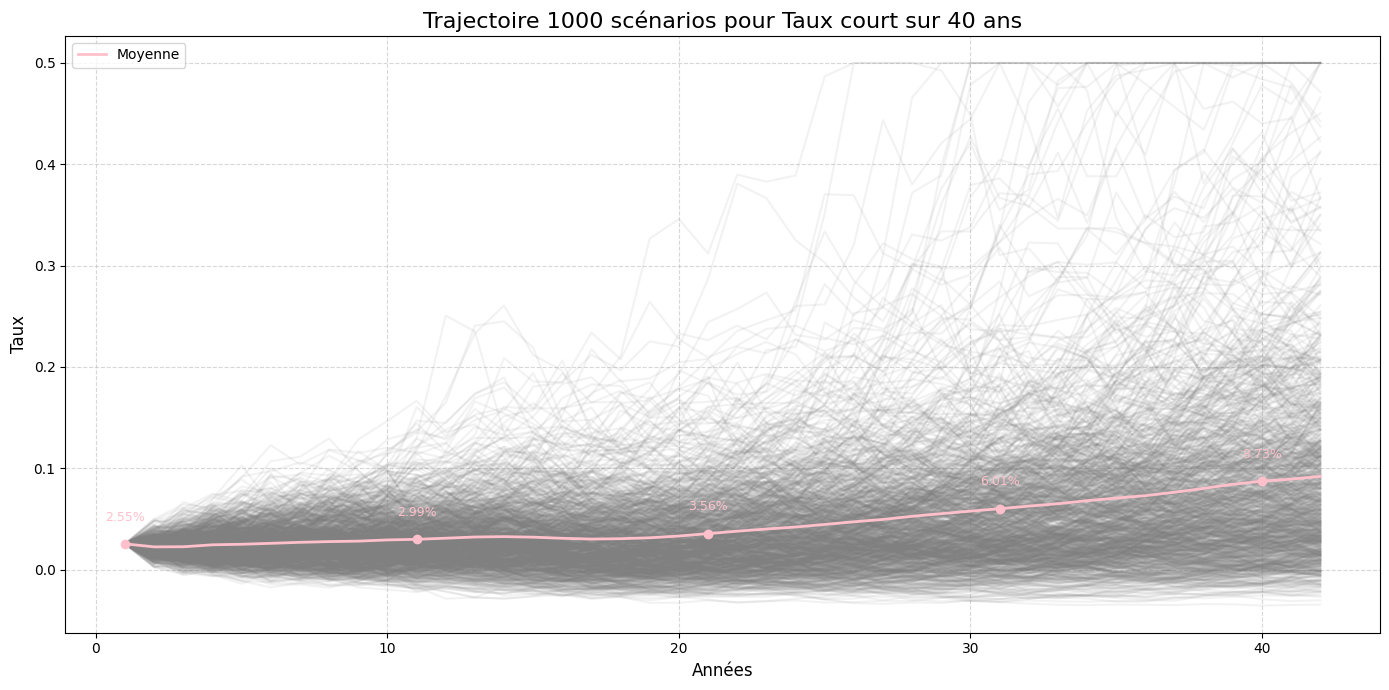

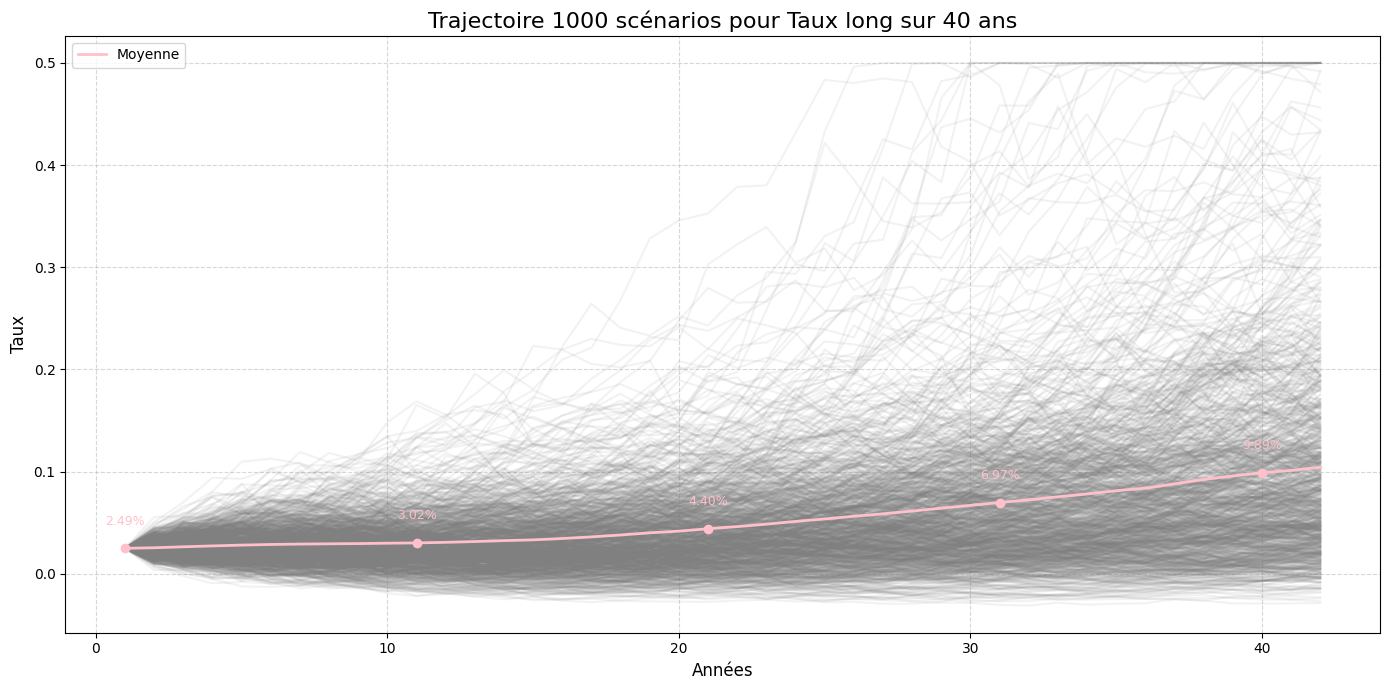

In [8]:
plot_scenario_trajectories(TL_matrix, maturities, "Trajectoire 1000 scénarios pour Taux court sur 40 ans")
plot_scenario_trajectories(TLT_matrix, maturities, "Trajectoire 1000 scénarios pour Taux long sur 40 ans")

Fonction de plot trajectoire positive & négative

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_positive_negative_trajectories(TL_matrix, maturities):
    """
    Sépare et trace les trajectoires positives et négatives selon la moyenne par scénario.

    Parameters:
    - TL_matrix : np.ndarray, shape (n_scenarios, n_years)
    - maturities : array-like, les années correspondantes
    """
    # Séparation des scénarios
    mean_by_scenario = TL_matrix.mean(axis=1)
    positive_indices = np.where(mean_by_scenario > 0)[0]
    negative_indices = np.where(mean_by_scenario < 0)[0]

    TL_positive = TL_matrix[positive_indices, :]
    TL_negative = TL_matrix[negative_indices, :]

    # Choix des années à annoter
    indices_to_annotate = [0, 10, 20, 30, 39]

    # 📈 Groupe 1 : Trajectoires positives
    plt.figure(figsize=(12, 6))
    for i in range(TL_positive.shape[0]):
        plt.plot(maturities, TL_positive[i, :], color='lightgreen', alpha=0.05)

    mean_pos = TL_positive.mean(axis=0)
    plt.plot(maturities, mean_pos, color='yellow', linewidth=2, label='Moyenne (positive)')

    for idx in indices_to_annotate:
        if idx < len(maturities):
            x = maturities[idx]
            y = mean_pos[idx]
            plt.scatter(x, y, color='yellow', zorder=5)
            plt.text(x, y + 0.02, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='yellow')

    plt.title(f"Trajectoires positives ({len(positive_indices)} scénarios)", fontsize=16)
    plt.xlabel("Années")
    plt.ylabel("Taux")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 📉 Groupe 2 : Trajectoires négatives
    plt.figure(figsize=(12, 6))
    for i in range(TL_negative.shape[0]):
        plt.plot(maturities, TL_negative[i, :], color='red', alpha=0.05)

    mean_neg = TL_negative.mean(axis=0)
    plt.plot(maturities, mean_neg, color='blue', linewidth=2, label='Moyenne (négative)')

    for idx in indices_to_annotate:
        if idx < len(maturities):
            x = maturities[idx]
            y = mean_neg[idx]
            plt.scatter(x, y, color='blue', zorder=5)
            plt.text(x, y + 0.02, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='blue')

    plt.title(f"Trajectoires négatives ({len(negative_indices)} scénarios)", fontsize=16)
    plt.xlabel("Années")
    plt.ylabel("Taux")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

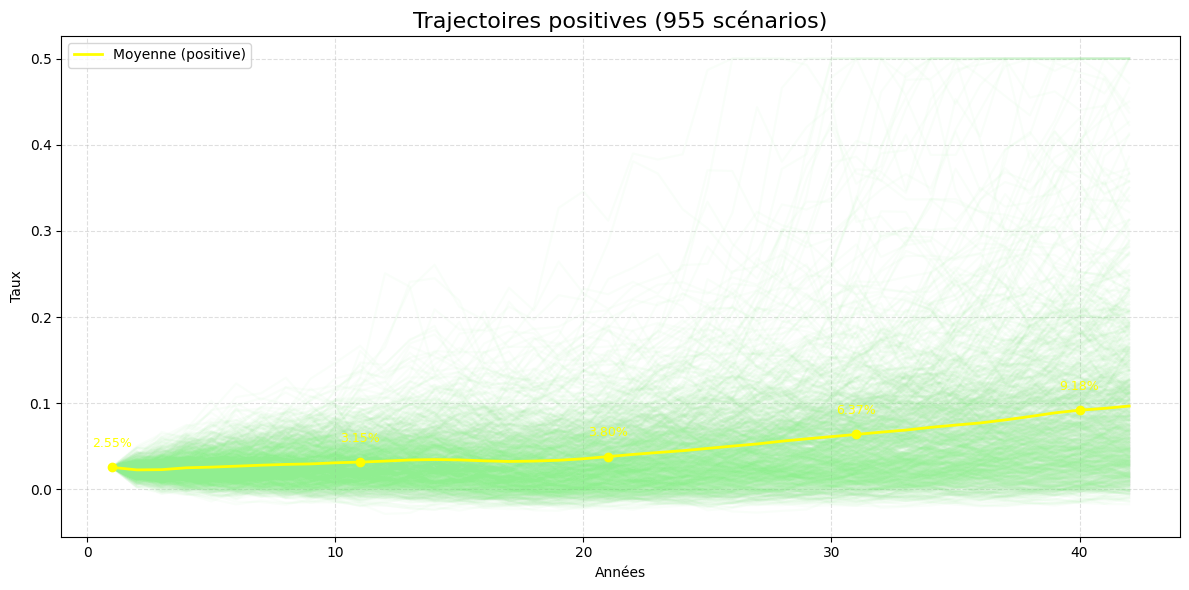

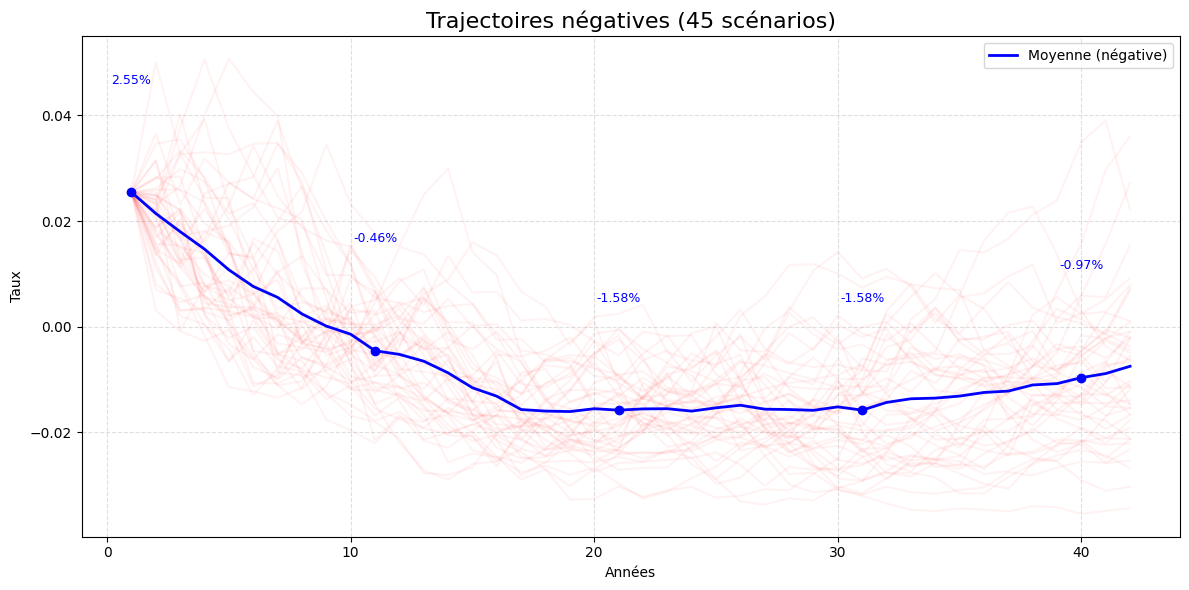

In [10]:
plot_positive_negative_trajectories(TL_matrix, maturities)

1.2 Statistiques descriptives par année ( par colonnes) sur les 1000 scnéarios

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_yearly_statistics(TL_matrix, maturities, plot_titre):
    """
    Trace les statistiques par année : moyenne, médiane, min, max, ±1 écart-type.

    Parameters:
    - TL_matrix : np.ndarray, shape (n_scenarios, n_years)
    - maturities : array-like, les années correspondantes
    - plot_titre : str, titre du graphique
    """
    # Calcul des statistiques
    mean_by_year = np.mean(TL_matrix, axis=0)
    median_by_year = np.median(TL_matrix, axis=0)
    std_by_year = np.std(TL_matrix, axis=0)
    min_by_year = np.min(TL_matrix, axis=0)
    max_by_year = np.max(TL_matrix, axis=0)

    # Indices à annoter
    indices_to_annotate = [0, 10, 20, 30, 39]

    plt.figure(figsize=(12, 6))

    # Tracer les courbes principales
    plt.plot(maturities, mean_by_year, label='Moyenne', color='blue', linewidth=2)
    plt.plot(maturities, median_by_year, label='Médiane', color='green', linestyle='--')
    plt.plot(maturities, min_by_year, label='Min', color='red', linestyle=':')
    plt.plot(maturities, max_by_year, label='Max', color='orange', linestyle=':')

    # Zone ±1 écart-type
    plt.fill_between(maturities,
                     mean_by_year - std_by_year,
                     mean_by_year + std_by_year,
                     alpha=0.2, label='Moyenne ±1σ', color='lightblue')

    # Points annotés
    for idx in indices_to_annotate:
        if idx < len(maturities):
            x = maturities[idx]

            y_mean = mean_by_year[idx]
            plt.scatter(x, y_mean, color='blue', zorder=5)
            plt.text(x, y_mean + 0.005, f"{y_mean*100:.2f}%", fontsize=9, ha='center', va='bottom', color='blue')

            y_median = median_by_year[idx]
            plt.scatter(x, y_median, color='green', zorder=5)
            plt.text(x, y_median + 0.005, f"{y_median*100:.2f}%", fontsize=9, ha='center', va='bottom', color='green')

            y_min = min_by_year[idx]
            plt.scatter(x, y_min, color='red', zorder=5)
            plt.text(x, y_min + 0.005, f"{y_min*100:.2f}%", fontsize=9, ha='center', va='bottom', color='red')

            y_max = max_by_year[idx]
            plt.scatter(x, y_max, color='orange', zorder=5)
            plt.text(x, y_max + 0.005, f"{y_max*100:.2f}%", fontsize=9, ha='center', va='bottom', color='orange')

    # Personnalisation
    plt.title(plot_titre, fontsize=16)
    plt.xlabel("Années", fontsize=12)
    plt.ylabel("Taux", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

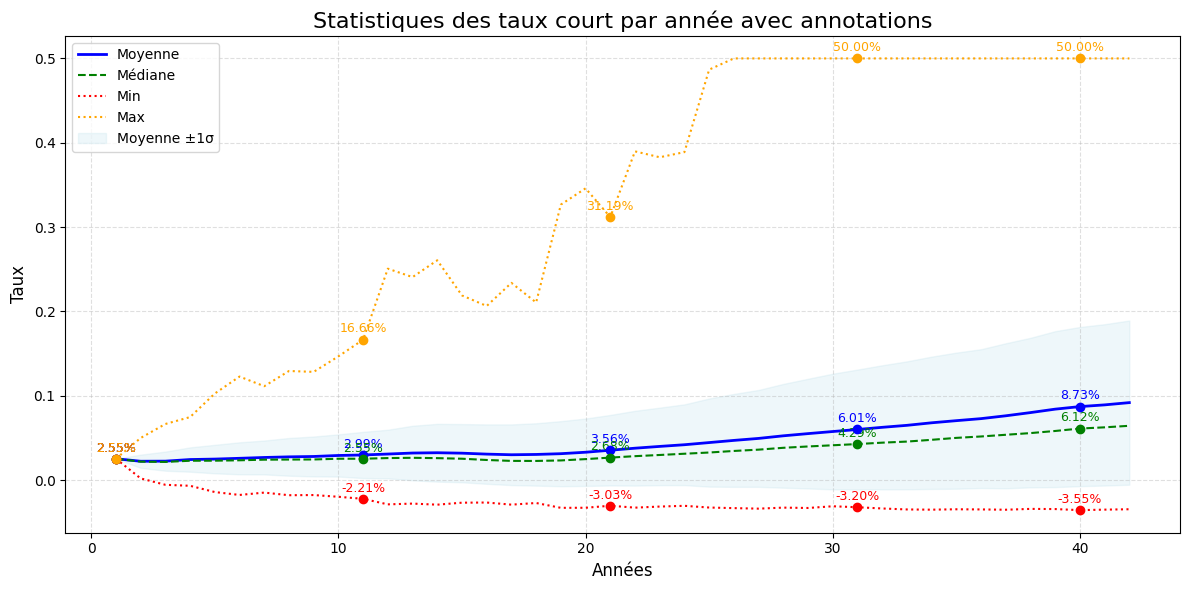

In [ ]:
plot_yearly_statistics(TL_matrix, maturities, "Statistiques des taux court par année avec annotations")

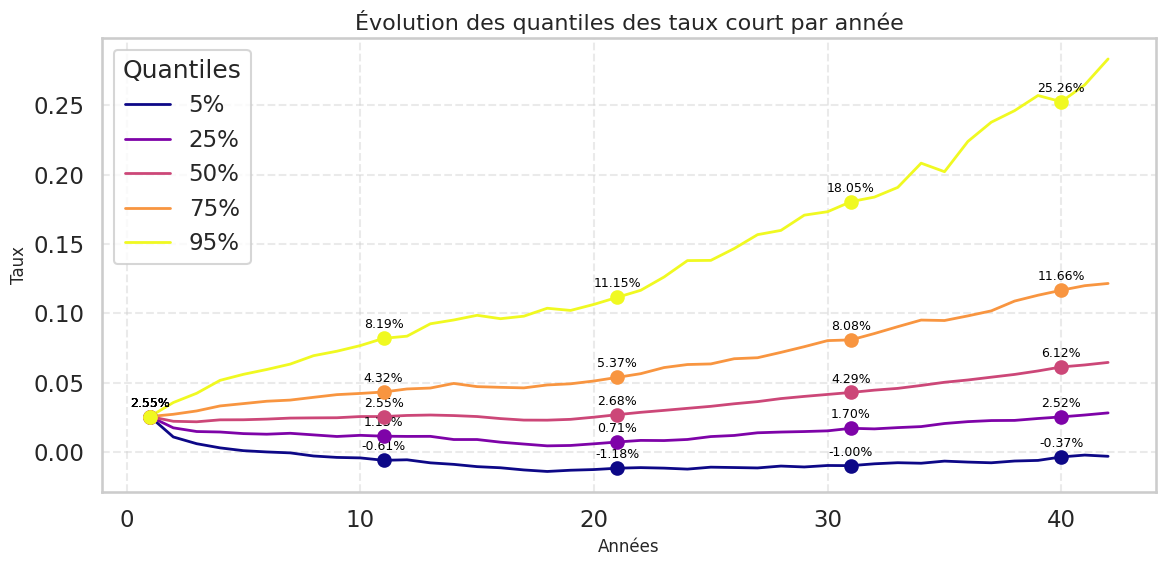

In [14]:

#*******************************************************************
# 1.2.2 - Quantile sur 1000 scénarios par année
#*******************************************************************
# Définir les niveaux de quantiles
quantile_levels = [0.05, 0.25, 0.5, 0.75, 0.95]

# Créer un DataFrame pour stocker les quantiles
quantile_df = pd.DataFrame(index=quantile_levels, columns=maturities)

# Calculer les quantiles pour chaque année
for i, year in enumerate(maturities):
    quantile_df[year] = np.quantile(TL_matrix[:, i], quantile_levels)

# Choisir les indices d'années à annoter (ex : début, milieu, fin)
indices_to_annotate = [0, 10, 20, 30, 39]

# Tracer les courbes de quantiles
plt.figure(figsize=(12, 6))
colors = plt.cm.plasma(np.linspace(0, 1, len(quantile_levels)))

for i, q in enumerate(quantile_levels):
    y_values = quantile_df.loc[q]
    plt.plot(maturities, y_values, label=f"{int(q*100)}%", color=colors[i], linewidth=2)

    # Ajouter des points annotés
    for idx in indices_to_annotate:
        x = maturities[idx]
        y = y_values.iloc[idx]
        plt.scatter(x, y, color=colors[i], zorder=5)
        plt.text(x, y + 0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='black')

# Personnalisation
plt.title("Évolution des quantiles des taux court par année", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.legend(title="Quantiles")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


1.3 Analyse par scénario / par ligne sur 40ans de projection

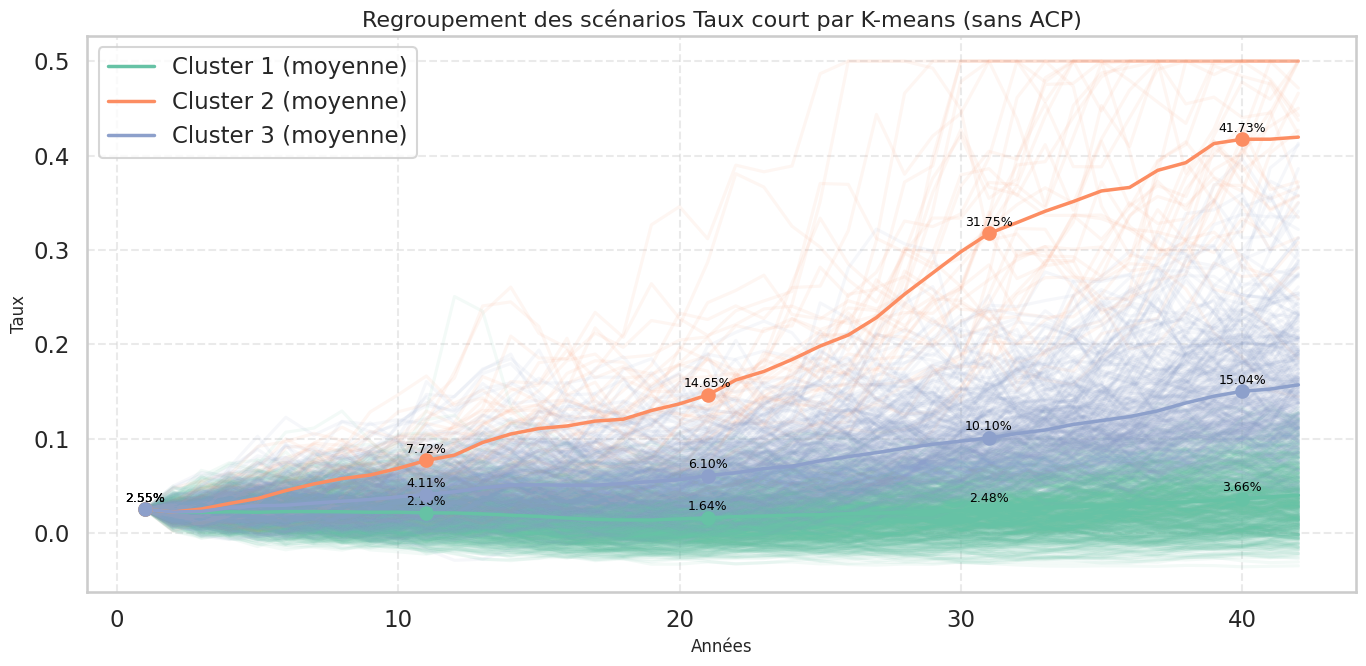

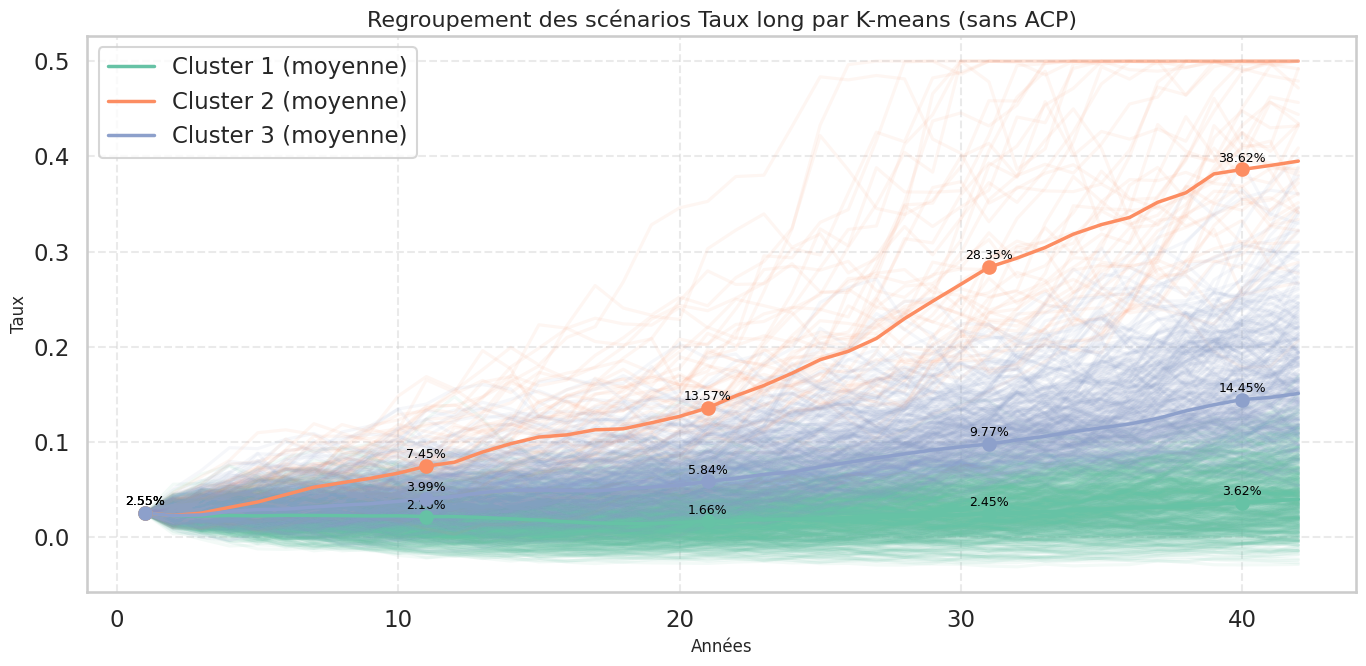

In [15]:
# ****************************************************************** Tuax court ******* axis = 0, par ligne/par scénario **************************************************
# Étape 1 : Appliquer K-means sur les scénarios
k = 3  # nombre de groupes à ajuster selon ton besoin
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(TL_matrix)

# Étape 2 : Visualiser les scénarios regroupés
plt.figure(figsize=(14, 7))
palette = sns.color_palette("Set2", k)

for cluster in range(k):
    cluster_indices = np.where(labels == cluster)[0]
    for i in cluster_indices:
        plt.plot(maturities, TL_matrix[i, :], color=palette[cluster], alpha=0.08)

# Ajouter les moyennes de chaque cluster
for cluster in range(k):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_mean = TL_matrix[cluster_indices].mean(axis=0)
    plt.plot(maturities, cluster_mean, color=palette[cluster], linewidth=2.5, label=f'Cluster {cluster+1} (moyenne)')

    # Choisir les années à annoter (ex : tous les 10 ans)
    indices_to_annotate = [0, 10, 20, 30, 39]  # ou toute autre sélection
    for idx in indices_to_annotate:
        x = maturities[idx]
        y = cluster_mean[idx]
        plt.scatter(x, y, color=palette[cluster], zorder=5)
        plt.text(x, y+0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='black')

# Personnalisation
plt.title("Regroupement des scénarios Taux court par K-means (sans ACP)", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


# ****************************************************************** Tuax long ******* axis = 0, par ligne/par scénario **************************************************
# Étape 1 : Appliquer K-means sur les scénarios
k = 3  # nombre de groupes à ajuster selon ton besoin
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(TLT_matrix)

# Étape 2 : Visualiser les scénarios regroupés
plt.figure(figsize=(14, 7))
palette = sns.color_palette("Set2", k)

for cluster in range(k):
    cluster_indices = np.where(labels == cluster)[0]
    for i in cluster_indices:
        plt.plot(maturities, TLT_matrix[i, :], color=palette[cluster], alpha=0.08)

# Ajouter les moyennes de chaque cluster
for cluster in range(k):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_mean = TL_matrix[cluster_indices].mean(axis=0)
    plt.plot(maturities, cluster_mean, color=palette[cluster], linewidth=2.5, label=f'Cluster {cluster+1} (moyenne)')

    # Choisir les années à annoter (ex : tous les 10 ans)
    indices_to_annotate = [0, 10, 20, 30, 39]  # ou toute autre sélection
    for idx in indices_to_annotate:
        x = maturities[idx]
        y = cluster_mean[idx]
        plt.scatter(x, y, color=palette[cluster], zorder=5)
        plt.text(x, y+0.005, f"{y*100:.2f}%", fontsize=9, ha='center', va='bottom', color='black')

# Personnalisation
plt.title("Regroupement des scénarios Taux long par K-means (sans ACP)", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def cluster_scenarios_kmeans(TL_matrix, plot_title, k=3):
    """
    Applique K-means sur les scénarios de taux et trace les clusters.

    Parameters:
    - TL_matrix : np.ndarray, shape (n_scenarios, n_years)
    - plot_title : str, titre du graphique
    - k : int, nombre de clusters (par défaut 3)

    Returns:
    - scenarios_by_cluster : dict, clés = "Cluster_i", valeurs = liste des indices de scénarios
    """
    # Étape 1 : Clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(TL_matrix)

    # Étape 2 : Coordonnées des points
    mean_by_scenario = TL_matrix.mean(axis=1)
    std_by_scenario = TL_matrix.std(axis=1)

    # Étape 3 : Visualisation
    plt.figure(figsize=(10, 7))
    palette = sns.color_palette("Set2", k)
    sns.scatterplot(x=mean_by_scenario, y=std_by_scenario, hue=labels,
                    palette=palette, s=50, alpha=0.8)

    # Étape 4 : Annotation des clusters
    for cluster in range(k):
        indices = np.where(labels == cluster)[0]
        x_cluster = mean_by_scenario[indices]
        y_cluster = std_by_scenario[indices]
        count = len(indices)
        x_text = np.median(x_cluster)
        y_text = np.median(y_cluster)
        plt.text(x_text, y_text, f"{count} scénarios", fontsize=12, weight='bold',
                 ha='center', va='center',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Personnalisation
    plt.title(plot_title, fontsize=16)
    plt.xlabel("Moyenne du scénario", fontsize=12)
    plt.ylabel("Volatilité du scénario (écart-type)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

    # Regrouper les indices par cluster
    scenarios_by_cluster = {}
    for cluster_id in range(k):
        indices = np.where(labels == cluster_id)[0]
        scenarios_by_cluster[f"Cluster_{cluster_id}"] = indices.tolist()

    # Affichage résumé
    for name, scenario_list in scenarios_by_cluster.items():
        print(f"{name} contient {len(scenario_list)} scénarios :")
        print(scenario_list[:20])
        print("...")

    return scenarios_by_cluster

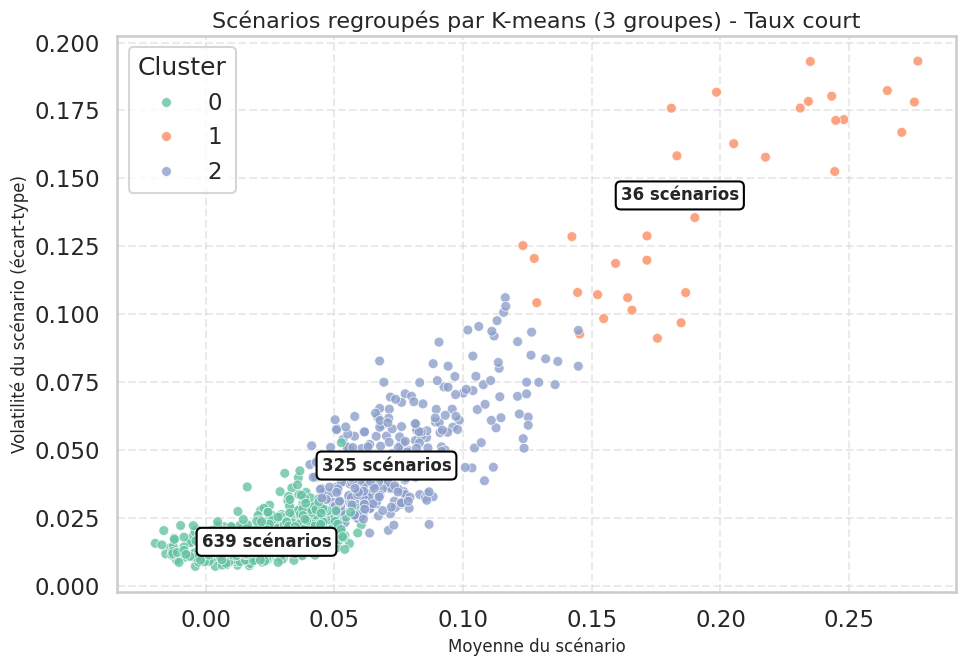

Cluster_0 contient 639 scénarios :
[0, 2, 4, 5, 7, 9, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 25, 26, 29]
...
Cluster_1 contient 36 scénarios :
[18, 28, 70, 76, 133, 191, 213, 272, 297, 314, 339, 363, 368, 373, 385, 450, 485, 513, 555, 581]
...
Cluster_2 contient 325 scénarios :
[1, 3, 6, 8, 10, 17, 24, 27, 31, 33, 35, 38, 40, 44, 47, 49, 54, 56, 61, 63]
...


In [20]:
scenarios_by_cluster = cluster_scenarios_kmeans(TL_matrix, "Scénarios regroupés par K-means (3 groupes) - Taux court")

TL_matrix.shape[0] :  1000
Corrélation moyenne : 0.234
Corrélation min : -0.482
Corrélation max : 0.903


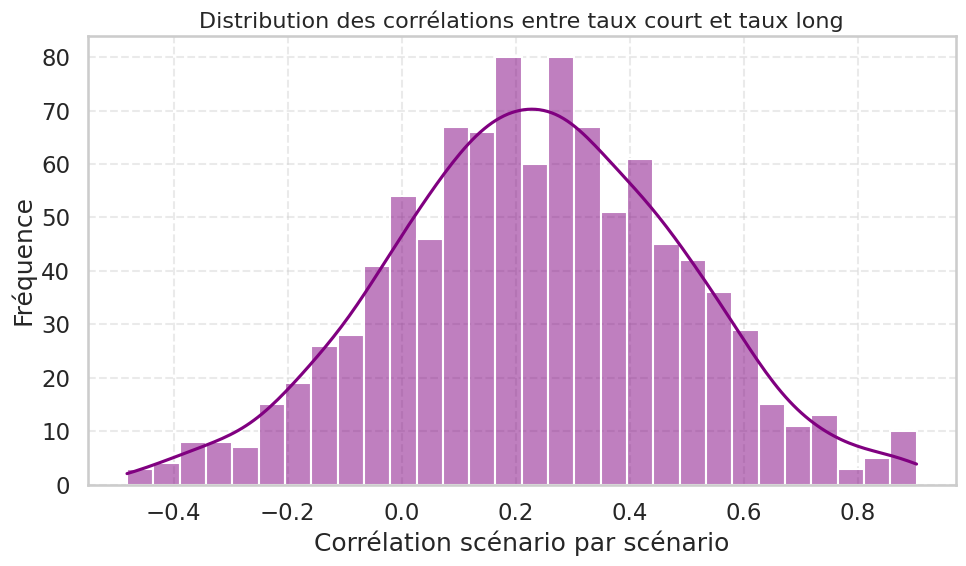

In [ ]:

# Vérification des dimensions
assert TL_matrix.shape == TLT_matrix.shape, "Les deux matrices doivent avoir la même forme"
print("TL_matrix.shape[0] : ", TL_matrix.shape[0])

# Étape 1 : Calcul de la corrélation scénario par scénario
correlations = []
for i in range(TL_matrix.shape[0]):
    corr = np.corrcoef(TL_matrix[i], TLT_matrix[i])[0, 1]
    correlations.append(corr)

correlations = np.array(correlations)

# Étape 2 : Statistiques descriptives
print(f"Corrélation moyenne : {np.mean(correlations):.3f}")
print(f"Corrélation min : {np.min(correlations):.3f}")
print(f"Corrélation max : {np.max(correlations):.3f}")

# Étape 3 : Visualisation de la distribution des corrélations
plt.figure(figsize=(10, 6))
sns.histplot(correlations, bins=30, kde=True, color='purple')
plt.title("Distribution des corrélations entre taux court et taux long", fontsize=16)
plt.xlabel("Corrélation scénario par scénario")
plt.ylabel("Fréquence")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

1.4 Quantiles Par année

# Section 2 - étude BE & PVFP

In [ ]:

# Charger les données
df = pd.read_excel("BE_PVFP.xlsx", header=None)
df.columns = ["Scenario", "BE", "PVFP"]

# Nettoyage : suppression des lignes vides ou non numériques
df = df[pd.to_numeric(df["BE"], errors='coerce').notnull()]
df = df[pd.to_numeric(df["PVFP"], errors='coerce').notnull()]
df["BE"] = df["BE"].astype(float)
df["PVFP"] = df["PVFP"].astype(float)

# Statistiques descriptives
print("📊 Statistiques descriptives :")
print(df[["BE", "PVFP"]].describe())

# Corrélation
correlation = df["BE"].corr(df["PVFP"])
print(f"\n🔗 Corrélation BE ↔ PVFP : {correlation:.4f}")

# Histogrammes
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["BE"], bins=30, kde=True, color='skyblue')
plt.title("Distribution de BE")
plt.xlabel("BE")

plt.subplot(1, 2, 2)
sns.histplot(df["PVFP"], bins=30, kde=True, color='salmon')
plt.title("Distribution de PVFP")
plt.xlabel("PVFP")

plt.tight_layout()
plt.show()

# Nuage de points
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="BE", y="PVFP", alpha=0.6)
plt.title("Relation entre BE et PVFP")
plt.xlabel("BE")
plt.ylabel("PVFP")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[["BE", "PVFP"]])
plt.title("Boxplots de BE et PVFP")
plt.tight_layout()
plt.show()

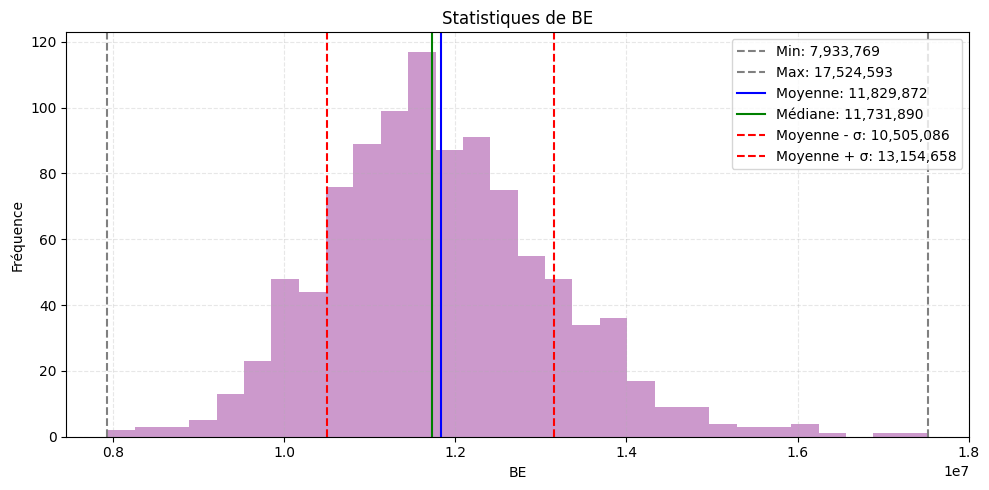

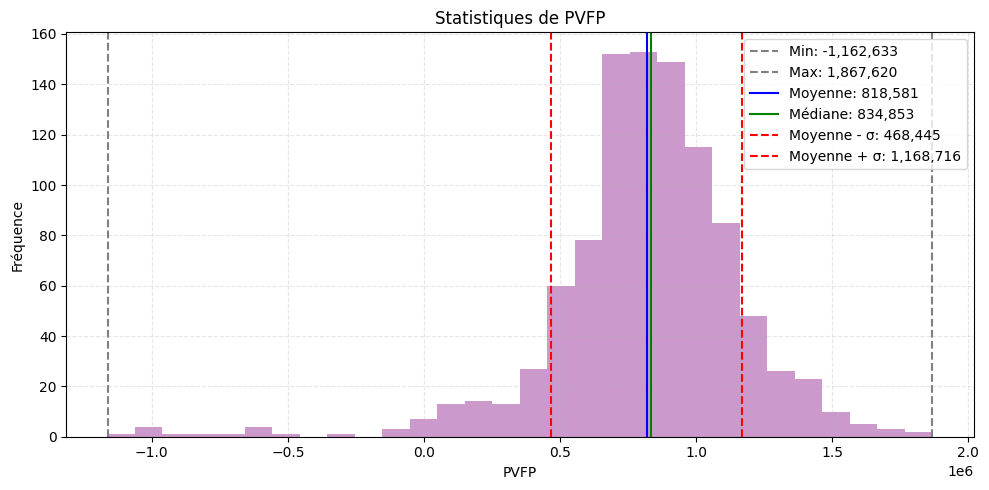

In [ ]:

# Charger les données
df = pd.read_excel("BE_PVFP.xlsx", header=None)
df.columns = ["Scenario", "BE", "PVFP"]

# Nettoyage
df = df[pd.to_numeric(df["BE"], errors='coerce').notnull()]
df = df[pd.to_numeric(df["PVFP"], errors='coerce').notnull()]
df["BE"] = df["BE"].astype(float)
df["PVFP"] = df["PVFP"].astype(float)

# Fonction pour tracer les statistiques
def plot_stat_summary(variable, name):
    data = df[variable]
    mean = data.mean()
    std = data.std()
    median = data.median()
    min_val = data.min()
    max_val = data.max()

    plt.figure(figsize=(10, 5))
    plt.axvline(min_val, color='gray', linestyle='--', label=f"Min: {min_val:,.0f}")
    plt.axvline(max_val, color='gray', linestyle='--', label=f"Max: {max_val:,.0f}")
    plt.axvline(mean, color='blue', linestyle='-', label=f"Moyenne: {mean:,.0f}")
    plt.axvline(median, color='green', linestyle='-', label=f"Médiane: {median:,.0f}")
    plt.axvline(mean - std, color='red', linestyle='--', label=f"Moyenne - σ: {(mean - std):,.0f}")
    plt.axvline(mean + std, color='red', linestyle='--', label=f"Moyenne + σ: {(mean + std):,.0f}")

    plt.hist(data, bins=30, alpha=0.4, color='purple')
    plt.title(f"Statistiques de {name}")
    plt.xlabel(name)
    plt.ylabel("Fréquence")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Tracer pour BE
plot_stat_summary("BE", "BE")

# Tracer pour PVFP
plot_stat_summary("PVFP", "PVFP")

# Annexe
